In [476]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Data Import

In [477]:
train = pd.read_csv('train.csv')
train.head(10)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


## Removing Columns That are not Useful

In [478]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [479]:
# The below columns cannot be useful features for prediction

In [480]:
train.drop(columns = ['passenger_id', 'name', 'ticket', 'boat', 'body', 'home.dest'], inplace = True)

## Removing Duplicates

In [481]:
train.shape

(850, 9)

In [482]:
train.drop_duplicates(inplace = True)

In [483]:
train.shape

(746, 9)

## Plots

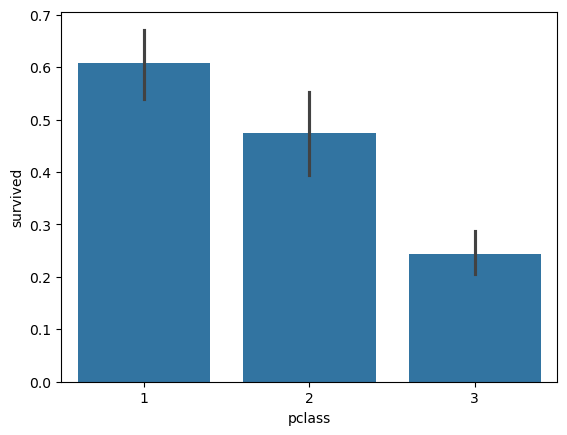

In [484]:
sns.barplot(x = 'pclass', y = 'survived', data = train)
plt.show()

<Axes: xlabel='survived', ylabel='fare'>

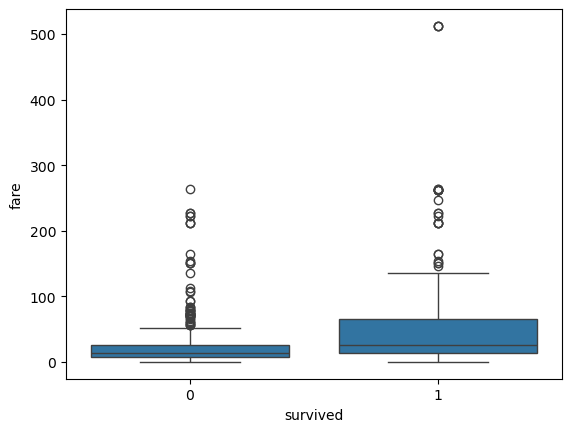

In [485]:
sns.boxplot(x = 'survived', y = 'fare', data = train)

## Splitting the Data

In [486]:
from sklearn.model_selection import train_test_split

In [487]:
x = train.drop(columns = ['survived'])
y = train['survived']

In [488]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [489]:
x_train.shape

(596, 8)

In [490]:
x_test.shape

(150, 8)

In [491]:
num_features_data = x_train[['age','sibsp','parch','fare']]

## Zero Variance

In [492]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
selector.fit(num_features_data)
selected_features = num_features_data.columns[selector.get_support()]
selected_features

Index(['age', 'sibsp', 'parch', 'fare'], dtype='object')

In [493]:
# All features have variance greater than 0, we can use all of them

## High Correlation

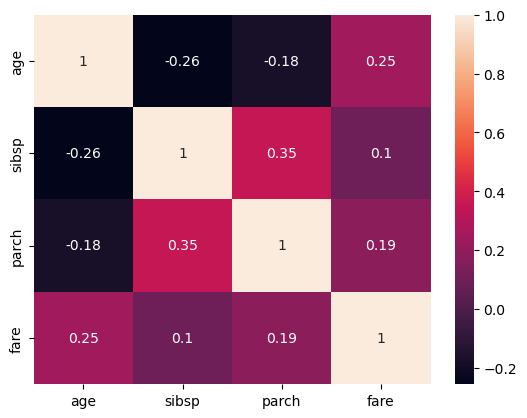

In [494]:
# checking for correlation among the features
corr = num_features_data.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [495]:
# no features are highly correlated

## Handling Null Values

In [496]:
x_train.isnull().sum()

pclass        0
sex           0
age          89
sibsp         0
parch         0
fare          0
cabin       450
embarked      1
dtype: int64

In [497]:
x_test.isnull().sum()

pclass        0
sex           0
age          14
sibsp         0
parch         0
fare          1
cabin       106
embarked      0
dtype: int64

In [498]:
cabin_missing = (x_train['cabin'].isnull().sum()/x_train.shape[0]) * 100
print(f"Missing values in cabin column: {cabin_missing:}%")

Missing values in cabin column: 75.50335570469798%


In [499]:
# Hence it is better to drop the cabin column
x_train.drop(columns = ['cabin'], inplace = True)
x_test.drop(columns = ['cabin'], inplace = True)

In [500]:
# Imputations
x_train['age'].fillna(x_train['age'].median(), inplace = True)
x_train['embarked'].fillna(x_train['embarked'].mode()[0], inplace = True)
x_train['fare'].fillna(x_train['fare'].mean(), inplace = True)
x_test['age'].fillna(x_test['age'].median(), inplace = True)
x_test['fare'].fillna(x_test['fare'].mean(), inplace = True)
x_test['embarked'].fillna(x_test['embarked'].mode()[0], inplace = True)

C:\Users\Jakkala\AppData\Local\Temp\ipykernel_14224\1206730277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['age'].fillna(x_train['age'].median(), inplace = True)
C:\Users\Jakkala\AppData\Local\Temp\ipykernel_14224\1206730277.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

## Handling Outliers

In [501]:
num_features = ['age','sibsp','parch','fare']
for feature in num_features:
    q1 = x_train[feature].quantile(0.25)
    q3 = x_train[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # capping outliers in training data
    x_train[feature] = np.clip(x_train[feature], lower_bound, upper_bound)
    y_train = y_train.loc[x_train.index]
    # capping for outliers in test data
    x_test[feature] = np.clip(x_test[feature], lower_bound, upper_bound)
    y_test = y_test.loc[x_test.index]

## Data Transformation

In [504]:
# skewness
for feature in num_features:
    print(f"Skewness of {feature} : {x_train[feature].skew()}")

Skewness of age : 0.2509912509333384
Skewness of sibsp : 1.4732996394036029
Skewness of parch : 1.7360063953047424
Skewness of fare : 1.007175368675389


<Axes: xlabel='age', ylabel='Count'>

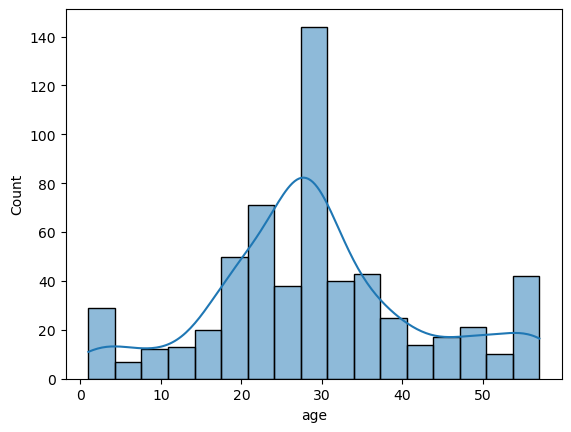

In [505]:
sns.histplot(x_train['age'], kde = True)

<Axes: xlabel='sibsp', ylabel='Count'>

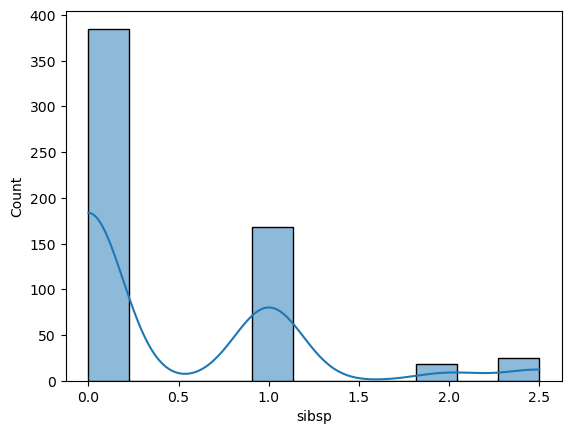

In [506]:
sns.histplot(x_train['sibsp'], kde = True)

<Axes: xlabel='parch', ylabel='Count'>

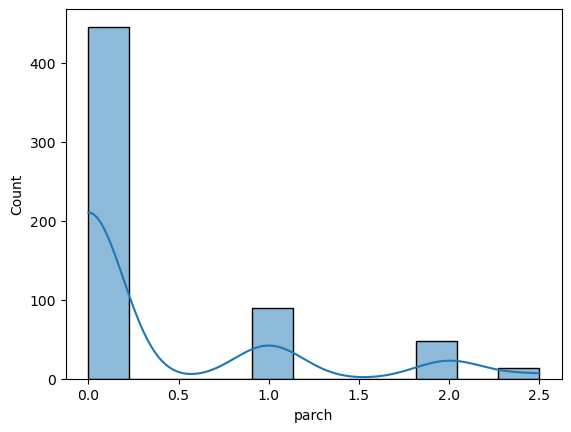

In [507]:
sns.histplot(x_train['parch'], kde = True)

<Axes: xlabel='fare', ylabel='Count'>

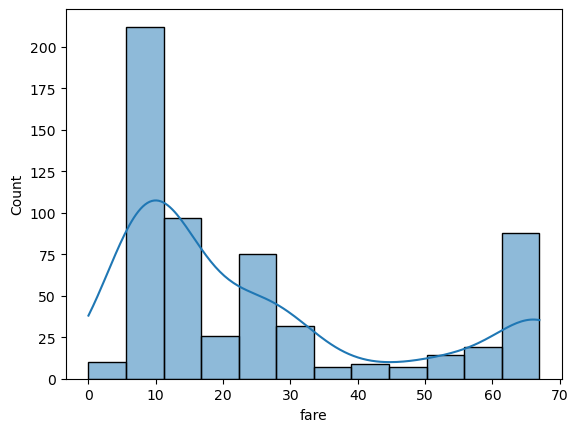

In [508]:
sns.histplot(x_train['fare'], kde = True)

In [509]:
# Transforming 'fare' feature
x_train['fare'] = np.log1p(x_train['fare'])
x_test['fare'] = np.log1p(x_test['fare'])

<Axes: xlabel='fare', ylabel='Count'>

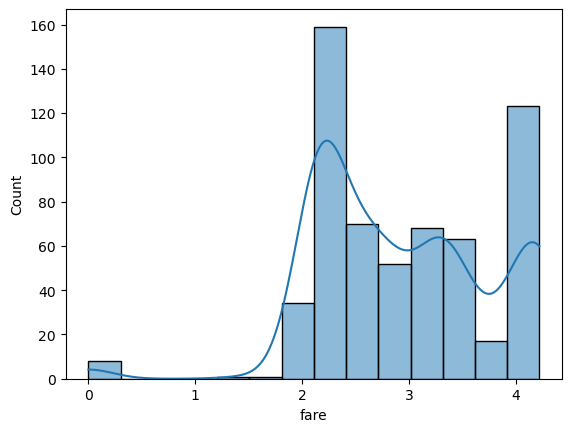

In [510]:
sns.histplot(x_train['fare'], kde = True)

In [511]:
x_train['fare'].skew()

np.float64(-0.19641423793209847)

In [512]:
x_test['fare'].skew()

np.float64(0.002211076277730061)

## Data Scaling

In [513]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[num_features] = scaler.fit_transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])

In [517]:
x_train.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked
390,2,female,-1.158903,0.810822,-0.529709,0.582285,C
839,1,male,1.289867,0.810822,-0.529709,1.415699,S
786,2,female,0.830723,-0.655794,-0.529709,-0.375510,S
381,1,male,-0.087566,-0.655794,-0.529709,0.617688,S
132,1,female,1.978584,-0.655794,-0.529709,0.487796,C
250,1,female,1.442915,0.810822,0.921815,1.522843,C
833,2,male,2.131632,-0.655794,-0.529709,-0.432627,Q
717,3,female,-0.087566,-0.655794,-0.529709,-1.014526,C
316,3,male,0.295054,-0.655794,-0.529709,-0.721140,S
599,3,female,-1.082379,0.810822,-0.529709,-0.256780,C


In [518]:
x_test.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked
414,3,male,-0.470187,-0.655794,-0.529709,-0.753025,S
450,2,male,1.595964,0.810822,-0.529709,0.413566,S
182,2,male,-0.317138,-0.655794,-0.529709,-0.611843,S
178,1,male,0.065482,0.810822,2.373339,1.522843,S
89,3,male,0.677675,-0.655794,-0.529709,-1.040364,S
650,2,female,0.830723,-0.655794,-0.529709,-0.160044,S
444,1,female,1.902060,0.810822,0.921815,1.522843,S
594,2,male,-0.623235,-0.655794,-0.529709,-0.375510,S
722,3,female,-0.852807,-0.655794,-0.529709,-1.013912,C
493,3,female,-0.546711,-0.655794,-0.529709,-0.683130,S


## One-Hot Encoding

In [521]:
x_train = pd.get_dummies(x_train, columns = ['pclass', 'sex', 'embarked'], drop_first = True)
x_test = pd.get_dummies(x_test, columns = ['pclass', 'sex', 'embarked'], drop_first = True)

In [522]:
x_train

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
390,-1.158903,0.810822,-0.529709,0.582285,True,False,False,False,False
839,1.289867,0.810822,-0.529709,1.415699,False,False,True,False,True
786,0.830723,-0.655794,-0.529709,-0.375510,True,False,False,False,True
381,-0.087566,-0.655794,-0.529709,0.617688,False,False,True,False,True
132,1.978584,-0.655794,-0.529709,0.487796,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
515,0.065482,-0.655794,-0.529709,0.489017,False,False,True,False,False
477,0.295054,0.810822,2.373339,0.489017,True,False,False,False,True
755,0.448102,-0.655794,-0.529709,-0.920332,False,True,True,False,True
726,1.136819,-0.655794,-0.529709,-0.916395,False,True,True,False,True


In [523]:
x_test

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
414,-0.470187,-0.655794,-0.529709,-0.753025,False,True,True,False,True
450,1.595964,0.810822,-0.529709,0.413566,True,False,True,False,True
182,-0.317138,-0.655794,-0.529709,-0.611843,True,False,True,False,True
178,0.065482,0.810822,2.373339,1.522843,False,False,True,False,True
89,0.677675,-0.655794,-0.529709,-1.040364,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
229,-0.087566,3.010747,2.373339,1.522843,False,False,False,False,True
311,-0.852807,2.277439,2.373339,1.522843,False,False,False,False,False
37,-1.235427,2.277439,2.373339,1.522843,False,False,True,False,False
371,0.142006,0.810822,0.921815,0.141296,False,True,False,False,True


In [524]:
x_train.isnull().sum()

age           0
sibsp         0
parch         0
fare          0
pclass_2      0
pclass_3      0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [526]:
x_test.isnull().sum()

age           0
sibsp         0
parch         0
fare          0
pclass_2      0
pclass_3      0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [527]:
x_train.shape

(596, 9)

In [528]:
x_test.shape

(150, 9)